In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Projects_ciência_dados\regression_car_price\data\interim\dataset_interim.csv')

In [3]:
dataset

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo
0,0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,30.0,False
1,1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,3.0,False
2,2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,NaN,3.0,False
3,3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,35.0,False
4,4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0,6.0,6.0,True
4005,4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.0,34.0,False
4006,4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998.0,NaN,NaN,False
4007,4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0,3.5,45.0,False


Valores faltantes

In [4]:
dataset.isnull().sum()

Unnamed: 0            0
brand                 0
model                 0
model_year            0
milage                0
fuel_type           170
engine                0
transmission          0
ext_col               0
int_col               0
accident            113
clean_title         596
price                 0
engine_size         403
engine_cylinders     78
engine_turbo          0
dtype: int64

Substituindo valores nulos pela média de valores não nulos

In [5]:
mean = dataset.loc[dataset['engine_size'] > 0, 'engine_size'].mean()

In [6]:
dataset.loc[dataset['engine_size'].isnull(), 'engine_size'] = mean 

In [7]:
dataset['engine'].isnull().sum()

np.int64(0)

In [8]:
np.unique(dataset['int_col'], return_counts=True)

(array(['AMG Black', 'Adrenaline Red', 'Agave Green', 'Almond Beige',
        'Amber', 'Anthracite', 'Aragon Brown', 'Ash', 'BEIGE', 'BLACK',
        'Beige', 'Beluga', 'Beluga Hide', 'Bianco Polar', 'Black',
        'Black / Brown', 'Black / Express Red', 'Black / Graphite',
        'Black / Gray', 'Black / Saddle', 'Black / Stone Grey',
        'Black Onyx', 'Black w/Red Stitching', 'Black/Graphite',
        'Black/Gun Metal', 'Black/Red', 'Black/Saddle Brown', 'Blk',
        'Blue', 'Boulder', 'Brandy', 'Brown', 'Camel', 'Camel Leather',
        'Canberra Beige', 'Canberra Beige/Black', 'Cappuccino', 'Caramel',
        'Carbon Black', 'Ceramic', 'Charcoal', 'Charcoal Black',
        'Charles Blue', 'Chateau', 'Chestnut', 'Classic Red', 'Cloud',
        'Cobalt Blue', 'Cocoa / Dune', 'Dark Ash', 'Dark Auburn',
        'Dark Galvanized', 'Dark Gray', 'Deep Chestnut', 'Deep Cypress',
        'Deep Garnet', 'Diesel Gray / Black', 'Ebony',
        'Ebony / Ebony Accents', 'Ebony / Piment

In [9]:
np.unique(dataset['ext_col'], return_counts=True)

(array(['Agate Black Metallic', 'Alfa White', 'Alpine White', 'Alta White',
        'Ametrin Metallic', 'Anodized Blue Metallic',
        'Anthracite Blue Metallic', 'Antimatter Blue Metallic',
        'Apex Blue', 'Arancio Borealis', 'Arctic Gray Metallic',
        'Arctic White', 'Atomic Silver', 'Aurora Black',
        'Aventurine Green Metallic', 'BLACK', 'BLU ELEOS', 'BLUE',
        'Balloon White', 'Baltic Gray', 'Barcelona Red', 'Bayside Blue',
        'Beige', 'Beluga Black', 'Bianco Icarus Metallic', 'Bianco Isis',
        'Bianco Monocerus', 'Billet Clearcoat Metallic',
        'Billet Silver Metallic Clearcoat', 'Black', 'Black Cherry',
        'Black Clearcoat', 'Black Forest Green', 'Black Noir Pearl',
        'Black Obsidian', 'Black Raven', 'Black Sapphire Metallic', 'Blu',
        'Blue', 'Blue Caelum', 'Blue Metallic', 'Blue Reflex Mica',
        'Blueprint', 'Brands Hatch Gray Metallic',
        'Bright White Clearcoat', 'Brilliant Black',
        'Brilliant Silver Me

Simplificando as cores

In [10]:
def simplificando_cor(cor):
    
    cor = cor.lower()
    
    if 'black' in cor or 'ebony' in cor:
        return 'black'
    if 'white' in cor or 'ivory' in cor:
        return 'white'
    if 'gray' in cor or 'grey' in cor or 'charcoal' in cor or 'graphite' in cor:
        return 'gray'
    if 'silver' in cor:
        return 'silver'
    if 'red' in cor or 'rosso' in cor:
        return 'red'
    if 'yellow' in cor or 'giallo' in cor:
        return 'yellow'
    if 'blue' in cor:
        return 'blue'
    if 'orange' in cor or 'arancio' in cor:
        return 'orange'
    if 'beige' in cor or 'tan' in cor or 'carmel' in cor:
        return 'beige'
    if 'green' in cor:
        return 'green'
    return 'Other'

In [11]:
dataset['color_simplified_ext'] = dataset['ext_col'].apply(simplificando_cor)

In [12]:
dataset['color_simplified_int'] = dataset['int_col'].apply(simplificando_cor)

In [13]:
dataset['Metallic'] = dataset['ext_col'].str.contains('Metallic', case=False)

In [14]:
dataset

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo,color_simplified_ext,color_simplified_int,Metallic
0,0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.700000,30.0,False,black,black,False
1,1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.800000,3.0,False,Other,gray,False
2,2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.713394,3.0,False,blue,black,False
3,3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.500000,35.0,False,black,black,False
4,4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.000000,2.0,True,white,black,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0,6.000000,6.0,True,Other,Other,False
4005,4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.000000,34.0,False,black,black,False
4006,4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998.0,3.713394,NaN,False,black,black,False
4007,4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0,3.500000,45.0,False,blue,black,False


In [15]:
dataset.isnull().sum()

Unnamed: 0                0
brand                     0
model                     0
model_year                0
milage                    0
fuel_type               170
engine                    0
transmission              0
ext_col                   0
int_col                   0
accident                113
clean_title             596
price                     0
engine_size               0
engine_cylinders         78
engine_turbo              0
color_simplified_ext      0
color_simplified_int      0
Metallic                  0
dtype: int64

In [16]:
dataset.shape

(4009, 19)

In [17]:
(2617/4009) *100

65.27812422050387

Substituindo valores nulos de fuel type por valores da moda dos valores não nulos

In [18]:
moda_fuel_type = dataset['fuel_type'].dropna().mode()[0]
moda_fuel_type

'Gasoline'

In [19]:
dataset.loc[dataset['fuel_type'].isnull(), 'fuel_type'] = moda_fuel_type

In [20]:
dataset['fuel_type'].isnull().sum()

np.int64(0)

Substituindo valores nulos de accident por valores da moda dos valores não nulos

In [21]:
moda_accident = dataset['accident'].dropna().mode()[0]
moda_accident

'None reported'

In [22]:
dataset.loc[dataset['accident'].isnull(), 'accident'] = moda_accident

In [23]:
dataset['accident'].isnull().sum()

np.int64(0)

Substituindo valores nulos de clean title por valores da moda dos valores não nulos

In [24]:
moda_clean_title = dataset['clean_title'].dropna().mode()[0]
moda_clean_title

'Yes'

In [25]:
dataset.loc[dataset['clean_title'].isnull(), 'clean_title'] = moda_clean_title

In [26]:
dataset['clean_title'].isnull().sum()

np.int64(0)

In [27]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'engine_size', 'engine_cylinders',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic'],
      dtype='object')

Substituindo valores nulos da cor externa por valores da moda dos valores não nulos

In [28]:
moda_cor_externa = dataset['color_simplified_ext'].dropna().mode()[0]
moda_cor_externa

'black'

In [29]:
dataset.loc[dataset['color_simplified_ext'].isnull(), 'color_simplified_ext'] = moda_cor_externa

Substituindo valores nulos da cor externa por valores da moda dos valores não nulos

In [30]:
moda_cor_int = dataset['color_simplified_int'].dropna().mode()[0]

In [31]:
dataset.loc[dataset['color_simplified_int'].isnull(), 'color_simplified_int'] = moda_cor_int

In [32]:
dataset['color_simplified_int'].isnull().sum()

np.int64(0)

In [33]:
dataset['engine_cylinders']

0       30.0
1        3.0
2        3.0
3       35.0
4        2.0
        ... 
4004     6.0
4005    34.0
4006     NaN
4007    45.0
4008    24.0
Name: engine_cylinders, Length: 4009, dtype: float64

In [34]:
dataset = dataset.drop('engine_cylinders', axis=1)

In [35]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'engine_size', 'engine_turbo',
       'color_simplified_ext', 'color_simplified_int', 'Metallic'],
      dtype='object')

In [36]:
dataset = dataset.drop(['engine', 'ext_col', 'int_col'], axis=1)

Peocurando valores inconsistentes

In [37]:
negativas = dataset.select_dtypes(['int', 'float'])
(negativas<0).any()

Unnamed: 0     False
model_year     False
milage         False
price          False
engine_size    False
dtype: bool

Brand possui amostras raras (<10), ent irei agrupar em 'Other'

In [38]:
np.unique(dataset['brand'], return_counts=True)

(array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object),
 array([ 64,  19,   9, 200, 375,  33,   1,  30, 107, 292,  28,  90,   5,
         12, 386,  91,  20,  63,  16,  72,  59,  47, 143,   2,  76,  26,
        130, 163,  52,   4,   3,  33,  34,   1,  64,   6, 315,   3,  20,
        116,   1,   1,  15, 201,  91,  17,  11,   2,   5,   6,  64,   1,
         87, 199,  59,  38,   1])

In [39]:
counts = dataset['brand'].value_counts()
rare = counts[counts < 10].index
dataset['brand'] = dataset['brand'].replace(rare, 'Other')

In [40]:
#dataset.loc[dataset['brand'] == 'Other']

Divisão em previsoras e classe

In [41]:
x = dataset.drop('price', axis=1)
x.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'accident', 'clean_title', 'engine_size',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic'],
      dtype='object')

In [42]:
x = x.drop('Unnamed: 0', axis=1)

In [43]:
x.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'accident', 'clean_title', 'engine_size', 'engine_turbo',
       'color_simplified_ext', 'color_simplified_int', 'Metallic'],
      dtype='object')

In [44]:
y = pd.DataFrame({
    'price':dataset['price']
})
y.columns

Index(['price'], dtype='object')

In [45]:
np.unique(dataset['transmission'], return_counts=True)

(array(['1-Speed A/T', '1-Speed Automatic', '10-Speed A/T',
        '10-Speed Automatic', '10-Speed Automatic with Overdrive', '2',
        '2-Speed A/T', '2-Speed Automatic', '4-Speed A/T',
        '4-Speed Automatic', '5-Speed A/T', '5-Speed Automatic',
        '5-Speed M/T', '6 Speed At/Mt', '6 Speed Mt', '6-Speed',
        '6-Speed A/T', '6-Speed Automatic',
        '6-Speed Automatic with Auto-Shift',
        '6-Speed Electronically Controlled Automatic with O',
        '6-Speed M/T', '6-Speed Manual', '7-Speed', '7-Speed A/T',
        '7-Speed Automatic', '7-Speed Automatic with Auto-Shift',
        '7-Speed DCT Automatic', '7-Speed M/T', '7-Speed Manual',
        '8-SPEED A/T', '8-SPEED AT', '8-Speed A/T', '8-Speed Automatic',
        '8-Speed Automatic with Auto-Shift', '8-Speed Manual',
        '9-Speed A/T', '9-Speed Automatic',
        '9-Speed Automatic with Auto-Shift', 'A/T',
        'Auto, 6-Spd w/CmdShft', 'Automatic', 'Automatic CVT',
        'Automatic, 10-Spd', 'Auto

In [46]:
def encontrando_marcha(marcha):

    if not isinstance(marcha, str):
        return "Other"

    marcha = marcha.upper()

    # Casos mais comuns primeiro
    if "1-SPEED" in marcha: return 1
    if "1 SPEED" in marcha: return 1

    if "2-SPEED" in marcha: return 2
    if "2 SPEED" in marcha: return 2

    if "3-SPEED" in marcha: return 3
    if "3 SPEED" in marcha: return 3

    if "4-SPEED" in marcha: return 4
    if "4 SPEED" in marcha: return 4

    if "5-SPEED" in marcha or "5-SPD" in marcha: return 5
    if "5 SPEED" in marcha: return 5

    if "6-SPEED" in marcha or "6-SPD" in marcha: return 6
    if "6 SPEED" in marcha: return 6

    if "7-SPEED" in marcha or "7-SPD" in marcha: return 7
    if "7 SPEED" in marcha: return 7

    if "8-SPEED" in marcha or "8-SPD" in marcha: return 8
    if "8 SPEED" in marcha: return 8

    if "9-SPEED" in marcha or "9-SPD" in marcha: return 9
    if "9 SPEED" in marcha: return 9

    if "10-SPEED" in marcha or "10-SPD" in marcha: return 10
    if "10 SPEED" in marcha: return 10

    return "Other"


In [47]:
def type_transmission(t):
    t = t.lower()
    
    if 'automatic' in t or 'a/t' in t:
        return 'Automatic'
    if 'cvt' in t:
        return 'CVT'
    if 'dual' in t or 'dct' in t:
        return 'DCT'
    if 'manual' in t or 'm/t' in t:
        return 'Manual'
    if 'single-speed' in t:
        return 'Single'
    return 'Other'

In [48]:
dataset['type_transmission'] = dataset['transmission'].apply(type_transmission)

In [49]:
dataset['type_transmission']

0       Automatic
1       Automatic
2       Automatic
3       Automatic
4       Automatic
          ...    
4004    Automatic
4005          DCT
4006    Automatic
4007    Automatic
4008    Automatic
Name: type_transmission, Length: 4009, dtype: object

In [50]:
np.unique(dataset['type_transmission'], return_counts=True)

(array(['Automatic', 'CVT', 'DCT', 'Manual', 'Other', 'Single'],
       dtype=object),
 array([3148,   63,  398,  372,   27,    1]))

In [51]:
dataset['speed'] = dataset['transmission'].apply(encontrando_marcha)

In [52]:
dataset['transmission'].head(20)

0                        6-Speed A/T
1                  8-Speed Automatic
2                          Automatic
3                        7-Speed A/T
4                  8-Speed Automatic
5                                  F
6                        6-Speed A/T
7                                A/T
8                        6-Speed A/T
9                                A/T
10                         Automatic
11                       8-Speed A/T
12                               A/T
13    Transmission w/Dual Shift Mode
14                         Automatic
15                               A/T
16                 9-Speed Automatic
17                               A/T
18                       6-Speed M/T
19                       8-Speed A/T
Name: transmission, dtype: object

In [53]:
dataset['speed'].head(20)

0         6
1         8
2     Other
3         7
4         8
5     Other
6         6
7     Other
8         6
9     Other
10    Other
11        8
12    Other
13    Other
14    Other
15    Other
16        9
17    Other
18        6
19        8
Name: speed, dtype: object

In [54]:
dataset['is_other'] = np.where(dataset['speed'] == 'Other', 1,0)

In [55]:
dataset['is_other']

0       0
1       0
2       1
3       0
4       0
       ..
4004    0
4005    1
4006    1
4007    1
4008    1
Name: is_other, Length: 4009, dtype: int64

In [56]:
dataset['transmission'].str.contains('Automatic').mean()

np.float64(0.17834871539037167)

<Axes: xlabel='speed', ylabel='count'>

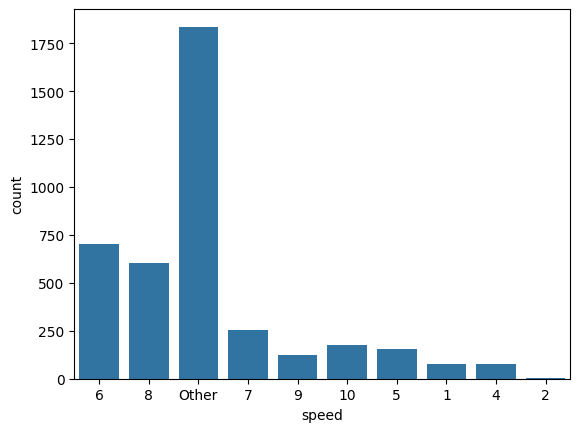

In [57]:
sns.countplot(data=dataset, x=dataset['speed'])

In [58]:
dataset['speed'] = (
    dataset['transmission']
    .str.extract(r'(\d)-Speed')
    #.str.extract(r'(\d)-Spd')
    .astype(float)
) 

In [59]:
import re

In [60]:
dataset['speed'] = (
    dataset['transmission']
    .str.extract(r'(\d+)\s*[- ]?\s*(?:Speed|Spd)', flags=re.IGNORECASE)
    .astype(float)
)


dataset['speed'] = dataset['speed'].astype(float)
dataset['speed'] = dataset['speed'].fillna("Other")


In [61]:
dataset['speed']

0         6.0
1         8.0
2       Other
3         7.0
4         8.0
        ...  
4004      8.0
4005    Other
4006    Other
4007    Other
4008    Other
Name: speed, Length: 4009, dtype: object

<Axes: xlabel='speed', ylabel='count'>

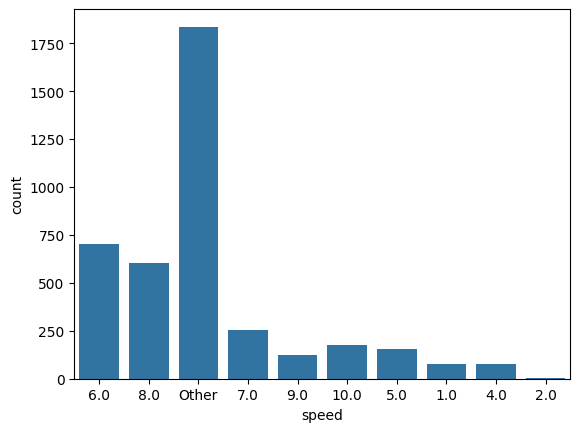

In [62]:
sns.countplot(data=dataset, x=dataset['speed'])

In [63]:
dataset['transmission'].unique()[:50]

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [64]:
import re

def extrair_speed(x):
    if pd.isna(x):
        return "Other"

    x = str(x).upper()  # normaliza

    # Captura qualquer número de 1 a 10 seguido opcionalmente de:
    # - hífen
    # - espaço
    # - "SPEED", "SPD", "SP", etc.
    padrao = r'(\b[1-9]|10)\s*[- ]?\s*(SPEED|SPD|SP)?\b'

    m = re.search(padrao, x)
    if m:
        return int(m.group(1))
    return "Other"

dataset['speed'] = dataset['transmission'].apply(extrair_speed)


In [65]:
dataset['speed_num'] = pd.to_numeric(dataset['speed'], errors='coerce')

In [66]:
dataset['speed_is_other'] = dataset['speed_num'].isna().astype(int)

In [67]:
dataset['speed_num'] = dataset['speed_num'].fillna(dataset['speed_num'].median())

<Axes: xlabel='speed', ylabel='count'>

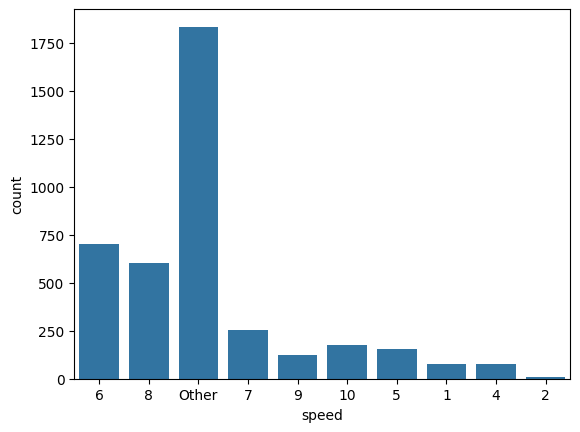

In [68]:
sns.countplot(data=dataset, x=dataset['speed'])

In [69]:
dataset = dataset.drop('speed', axis=1)

In [70]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'accident', 'clean_title', 'price', 'engine_size',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic', 'type_transmission', 'is_other', 'speed_num',
       'speed_is_other'],
      dtype='object')

In [71]:
np.unique(dataset['type_transmission'], return_counts=True)

(array(['Automatic', 'CVT', 'DCT', 'Manual', 'Other', 'Single'],
       dtype=object),
 array([3148,   63,  398,  372,   27,    1]))

In [72]:
np.unique(dataset['type_transmission'], return_counts=True)

(array(['Automatic', 'CVT', 'DCT', 'Manual', 'Other', 'Single'],
       dtype=object),
 array([3148,   63,  398,  372,   27,    1]))

In [73]:
dataset = dataset.drop(['transmission', 'is_other'], axis=1)

In [74]:
x = dataset.drop(['price', 'Unnamed: 0'], axis=1)

In [75]:
x.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'accident',
       'clean_title', 'engine_size', 'engine_turbo', 'color_simplified_ext',
       'color_simplified_int', 'Metallic', 'type_transmission', 'speed_num',
       'speed_is_other'],
      dtype='object')

Divisão em treino e teste

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

Encontrando variáveis numéricas

In [78]:
numericas = x_train.select_dtypes(include=['int', 'float']).columns.to_list()
numericas

['model_year', 'milage', 'engine_size', 'speed_num', 'speed_is_other']

Encontrando variáveis categóricas

In [79]:
categoricas = x_train.select_dtypes(include=['object']).columns.to_list()
categoricas

['brand',
 'model',
 'fuel_type',
 'accident',
 'clean_title',
 'color_simplified_ext',
 'color_simplified_int',
 'type_transmission']

In [80]:
for col in categoricas:
    print(col, x_train[col].map(type).unique())


brand [<class 'str'>]
model [<class 'str'>]
fuel_type [<class 'str'>]
accident [<class 'str'>]
clean_title [<class 'str'>]
color_simplified_ext [<class 'str'>]
color_simplified_int [<class 'str'>]
type_transmission [<class 'str'>]


In [81]:
x_train.isnull().sum()

brand                   0
model                   0
model_year              0
milage                  0
fuel_type               0
accident                0
clean_title             0
engine_size             0
engine_turbo            0
color_simplified_ext    0
color_simplified_int    0
Metallic                0
type_transmission       0
speed_num               0
speed_is_other          0
dtype: int64

In [82]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3006 entries, 3768 to 3427
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3006 non-null   object 
 1   model                 3006 non-null   object 
 2   model_year            3006 non-null   int64  
 3   milage                3006 non-null   float64
 4   fuel_type             3006 non-null   object 
 5   accident              3006 non-null   object 
 6   clean_title           3006 non-null   object 
 7   engine_size           3006 non-null   float64
 8   engine_turbo          3006 non-null   bool   
 9   color_simplified_ext  3006 non-null   object 
 10  color_simplified_int  3006 non-null   object 
 11  Metallic              3006 non-null   bool   
 12  type_transmission     3006 non-null   object 
 13  speed_num             3006 non-null   float64
 14  speed_is_other        3006 non-null   int64  
dtypes: bool(2), float64(3),

Aplicando Encoder e normalização

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [84]:
preprocessor = ColumnTransformer([
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categoricas),
    ('scaler', StandardScaler(), numericas)
])

In [85]:
preprocessor.set_output(transform='pandas')

,transformers,"[('one_hot', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [86]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [87]:
x_train

,one_hot__brand_Acura,one_hot__brand_Alfa,one_hot__brand_Audi,one_hot__brand_BMW,one_hot__brand_Bentley,one_hot__brand_Buick,one_hot__brand_Cadillac,one_hot__brand_Chevrolet,one_hot__brand_Chrysler,one_hot__brand_Dodge,...,one_hot__type_transmission_CVT,one_hot__type_transmission_DCT,one_hot__type_transmission_Manual,one_hot__type_transmission_Other,one_hot__type_transmission_Single,scaler__model_year,scaler__milage,scaler__engine_size,scaler__speed_num,scaler__speed_is_other
3768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.239078,-1.215133,-0.002307,0.062392,1.109786
3696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.073648,-1.202605,-0.159726,0.062392,1.109786
3993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.908217,-1.099952,-0.528570,0.786520,-0.901074
1248,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.746089,0.090046,-1.266259,-0.661737,-0.901074
576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.411925,-0.388558,-1.266259,1.510648,-0.901074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.073648,-0.915982,-1.635103,0.786520,-0.901074
3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.908217,-0.646101,-0.159726,2.234776,-0.901074
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-2.069533,3.018915,-0.971183,0.062392,1.109786
2522,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.411925,-0.276300,-1.266259,0.062392,1.109786


In [88]:
from scipy.stats import trim_mean

In [89]:
trim_mean(dataset['price'], 0.1)

np.float64(34151.68744157058)

In [90]:
dataset['price'].median()

np.float64(31000.0)

In [91]:
type(dataset['price'][0])

numpy.float64

In [92]:
x_train.shape, x_test.shape

((3006, 1674), (1003, 1674))

In [93]:
x_train.to_csv('../data/processed/x_train.csv', index=False)
x_test.to_csv('../data/processed/x_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)